<a href="https://colab.research.google.com/github/Samuel1223/Reverse-Engineering-for-Network-Protocols/blob/main/Pcap%20Files%20to%20Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pcapng


In [ ]:
https://www.youtube.com/watch?v=gOcT5r0spVM

以下是pcap 檔案

## parsing PCAP 檔案

In [ ]:
! pip install scapy

     |████████████████████████████████| 1.1 MB 37.9 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261554 sha256=0e3ac4ef3d399f86638bf27a186bbe97e474a035bedd9e5db4fff161cfbe7360
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [ ]:
from scapy.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traffic = rdpcap('/content/drive/My Drive/資策會＿反向工程＿pcap/44818_eth0_00001_20210325095818 (2).pcapng')

In [ ]:
traffic

<44818_eth0_00001_20210325095818 (2).pcapng: TCP:14073 UDP:0 ICMP:0 Other:0>

### unique IP Addresses

In [ ]:
unique_ip_address = []

for packet in traffic:
    src = packet[IP].src
    dst = packet[IP].dst
    
    unique_ip_address.append(src)
    unique_ip_address.append(dst)
    
print(set(unique_ip_address))

{'10.0.100.16', '10.0.100.15', '10.0.100.20', '10.0.100.106', '10.0.100.21', '10.0.100.110', '10.0.100.105'}


In [ ]:
print(unique_ip_address)

['10.0.100.21', '10.0.100.110', '10.0.100.16', '10.0.100.105', '10.0.100.16', '10.0.100.105', '10.0.100.105', '10.0.100.16', '10.0.100.105', '10.0.100.16', '10.0.100.21', '10.0.100.110', '10.0.100.110', '10.0.100.21', '10.0.100.110', '10.0.100.21', '10.0.100.21', '10.0.100.110', '10.0.100.110', '10.0.100.21', '10.0.100.110', '10.0.100.21', '10.0.100.16', '10.0.100.105', '10.0.100.105', '10.0.100.106', '10.0.100.106', '10.0.100.105', '10.0.100.15', '10.0.100.105', '10.0.100.105', '10.0.100.15', '10.0.100.105', '10.0.100.15', '10.0.100.21', '10.0.100.110', '10.0.100.15', '10.0.100.105', '10.0.100.105', '10.0.100.15', '10.0.100.105', '10.0.100.15', '10.0.100.16', '10.0.100.105', '10.0.100.105', '10.0.100.16', '10.0.100.105', '10.0.100.16', '10.0.100.21', '10.0.100.110', '10.0.100.110', '10.0.100.21', '10.0.100.110', '10.0.100.21', '10.0.100.15', '10.0.100.105', '10.0.100.21', '10.0.100.110', '10.0.100.16', '10.0.100.105', '10.0.100.16', '10.0.100.105', '10.0.100.105', '10.0.100.16', '10.0

### Unique Port Numbers

In [ ]:
unique_port_address = []

for packet in traffic[TCP]:
    
    sport = packet[TCP].sport
    dport = packet[TCP].dport
    
    unique_port_address.append(sport)
    unique_port_address.append(dport)

print(set(unique_port_address))

{52288, 53056, 52290, 57893, 64271, 64272, 44818, 53011, 61528}


In [ ]:
traffic[0]

<Ether  dst=f4:54:33:82:f8:c5 src=d0:37:45:c9:f9:94 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=40 id=12204 flags=DF frag=0 ttl=128 proto=6 chksum=0xeea0 src=10.0.100.21 dst=10.0.100.110 |<TCP  sport=53011 dport=44818 seq=2961081432 ack=234904740 dataofs=5 reserved=0 flags=A window=513 chksum=0xb3ae urgptr=0 |<Padding  load='\x00\x00\x00\x00\x00\x00' |>>>>

In [ ]:
traffic[0].payload

<IP  version=4 ihl=5 tos=0x0 len=40 id=12204 flags=DF frag=0 ttl=128 proto=6 chksum=0xeea0 src=10.0.100.21 dst=10.0.100.110 |<TCP  sport=53011 dport=44818 seq=2961081432 ack=234904740 dataofs=5 reserved=0 flags=A window=513 chksum=0xb3ae urgptr=0 |<Padding  load='\x00\x00\x00\x00\x00\x00' |>>>

## 轉dataframe & df label = 0 好的資料！！

In [ ]:
traffic[0].payload.id
rows = []

for i in traffic:
    
    len_ = i.payload.len
    id_ = i.payload.id
    frag = i.payload.frag
    ttl = i.payload.ttl
    proto = i.payload.proto
    src =  i.payload.src
    dst =  i.payload.dst
    window = i.payload.window
    
    rows.append((len_, id_,frag, ttl,proto, src,dst, window))
#print(rows)

#for i in rows:
    #print(i)
    
import pandas as pd

df = pd.DataFrame(rows, columns = ['len','id','frag','ttl','proto','src','dst', 'window'])
print(df) 

df['label'] = 0
print(df)

       len     id  frag  ttl  proto           src           dst  window
0       40  12204     0  128      6   10.0.100.21  10.0.100.110     513
1       40  10753     0  128      6   10.0.100.16  10.0.100.105     509
2       94  10754     0  128      6   10.0.100.16  10.0.100.105     509
3       40   6872     0   64      6  10.0.100.105   10.0.100.16    8138
4      474   7128     0   64      6  10.0.100.105   10.0.100.16    8192
...    ...    ...   ...  ...    ...           ...           ...     ...
14068   40  22349     0   64      6  10.0.100.110   10.0.100.21    8138
14069  580  22605     0   64      6  10.0.100.110   10.0.100.21    8192
14070   94  14638     0  128      6   10.0.100.21  10.0.100.110     511
14071   40  22861     0   64      6  10.0.100.110   10.0.100.21    8138
14072  580  23117     0   64      6  10.0.100.110   10.0.100.21    8192

[14073 rows x 8 columns]
       len     id  frag  ttl  proto           src           dst  window  label
0       40  12204     0  128   

## 捏出來的len & label == 1

In [ ]:

import numpy as np

df_len = df.copy()

np.random.seed(6)

ran_len = np.random.randint(10,1000,14073)
ran_ttl = np.random.randint(100,1000,14073)
ran_window = np.random.randint(10,1000,14073)

df_len['len'] = ran_len
df_len['ttl'] = ran_ttl
df_len['window'] = ran_window

df_len['label'] = 1

df_len

,len,id,frag,ttl,proto,src,dst,window,label
0,916,12204,0,569,6,10.0.100.21,10.0.100.110,918,1
1,723,10753,0,135,6,10.0.100.16,10.0.100.105,584,1
2,237,10754,0,174,6,10.0.100.16,10.0.100.105,202,1
3,990,6872,0,345,6,10.0.100.105,10.0.100.16,495,1
4,628,7128,0,756,6,10.0.100.105,10.0.100.16,262,1
...,...,...,...,...,...,...,...,...,...
14068,193,22349,0,748,6,10.0.100.110,10.0.100.21,431,1
14069,780,22605,0,393,6,10.0.100.110,10.0.100.21,612,1
14070,100,14638,0,846,6,10.0.100.21,10.0.100.110,755,1
14071,471,22861,0,170,6,10.0.100.110,10.0.100.21,340,1


## 把他們兩個concate成一個大的dataframe

In [ ]:
frames = [df,df_len]
result = pd.concat(frames)
result

,len,id,frag,ttl,proto,src,dst,window,label
0,40,12204,0,128,6,10.0.100.21,10.0.100.110,513,0
1,40,10753,0,128,6,10.0.100.16,10.0.100.105,509,0
2,94,10754,0,128,6,10.0.100.16,10.0.100.105,509,0
3,40,6872,0,64,6,10.0.100.105,10.0.100.16,8138,0
4,474,7128,0,64,6,10.0.100.105,10.0.100.16,8192,0
...,...,...,...,...,...,...,...,...,...
14068,193,22349,0,748,6,10.0.100.110,10.0.100.21,431,1
14069,780,22605,0,393,6,10.0.100.110,10.0.100.21,612,1
14070,100,14638,0,846,6,10.0.100.21,10.0.100.110,755,1
14071,471,22861,0,170,6,10.0.100.110,10.0.100.21,340,1


## decision tree

In [ ]:
from sklearn.model_selection import  train_test_split

X = result.drop(['label','src', 'dst'], axis= 1)
y = result['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.tree import  DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[4220    1]
 [   3 4220]]


In [ ]:
! pip install pydot

In [ ]:
X.columns

Index(['len', 'id', 'frag', 'ttl', 'proto', 'window'], dtype='object')

## 反向工程 找threshold

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)

print('stuff')
with open('output.txt','w') as f:
    f.write(cap.stdout)

|--- feature_3 <= 128.50
|   |--- feature_5 <= 506.00
|   |   |--- class: 1
|   |--- feature_5 >  506.00
|   |   |--- feature_0 <= 592.00
|   |   |   |--- feature_0 <= 31.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  31.00
|   |   |   |   |--- feature_0 <= 101.00
|   |   |   |   |   |--- feature_0 <= 42.50
|   |   |   |   |   |   |--- feature_1 <= 10943.50
|   |   |   |   |   |   |   |--- feature_1 <= 10941.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  10941.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  10943.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  42.50
|   |   |   |   |   |   |--- feature_0 <= 89.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  89.50
|   |   |   |   |   |   |   |--- feature_5 <= 689.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  68

NameError: ignored

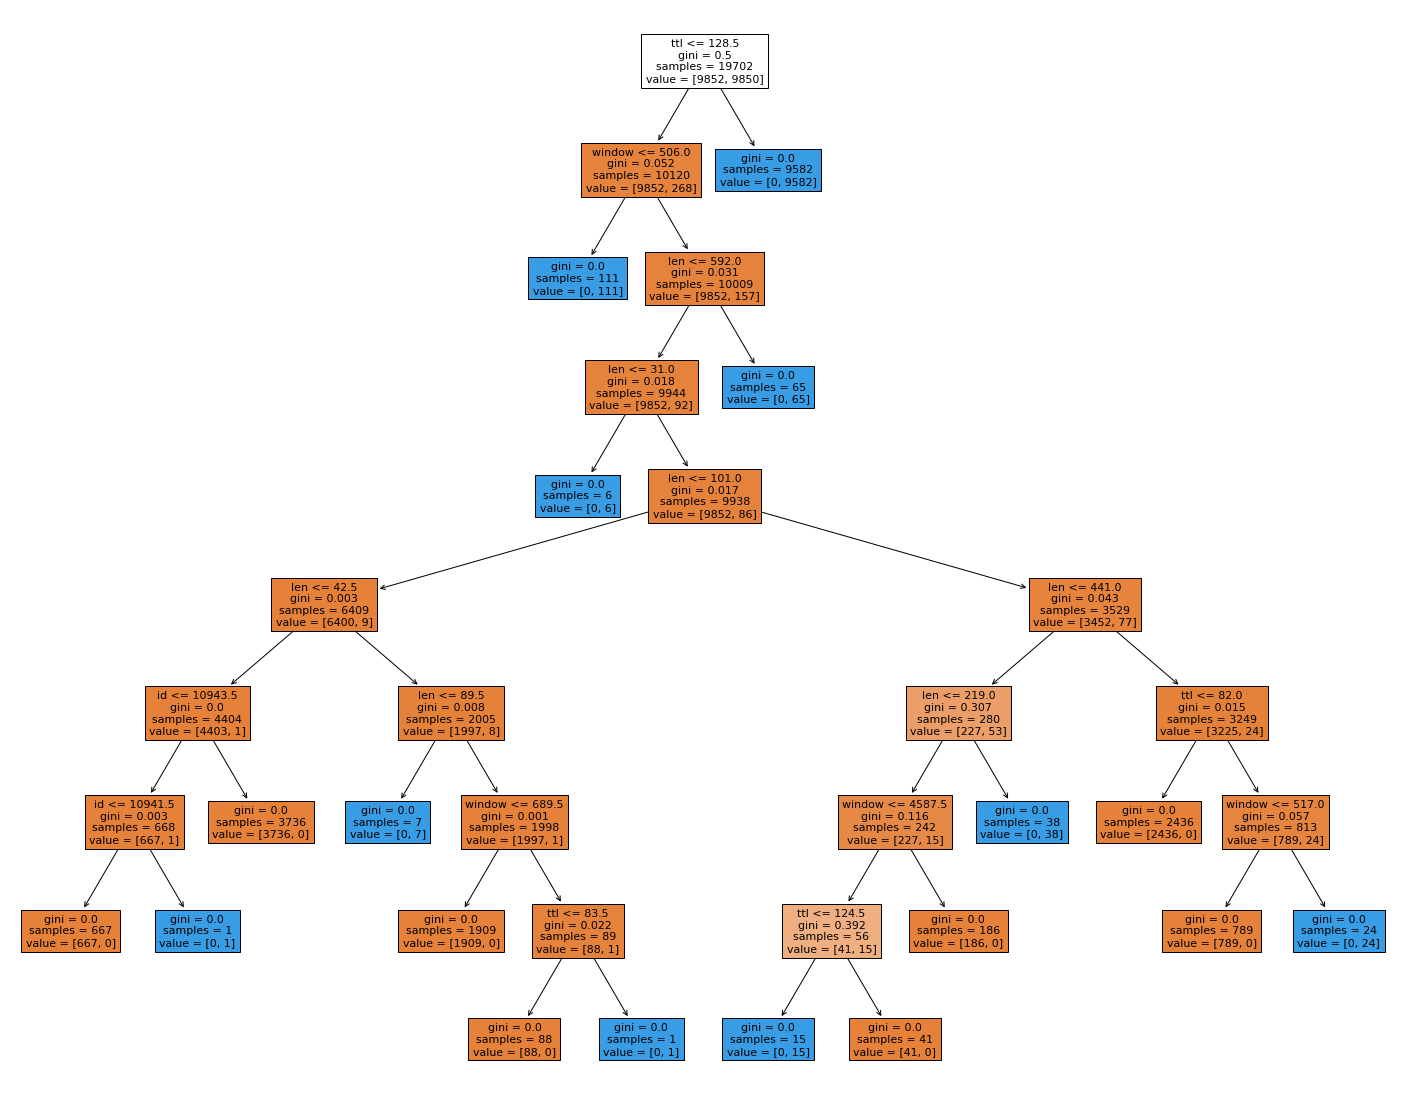

In [ ]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(dtree, feature_names = list(X.columns), filled = True)

In [ ]:
! pip install dtreeviz

     |████████████████████████████████| 61 kB 572 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=01adf312690923d83f576b914c1809ce131b0adca41f7b23976c2bcc6e0f1d75
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


In [ ]:
! pip install graphviz

In [ ]:
! pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dtree,X,y)

viz
plt.savefig('plotviz.png')         #保存图片





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

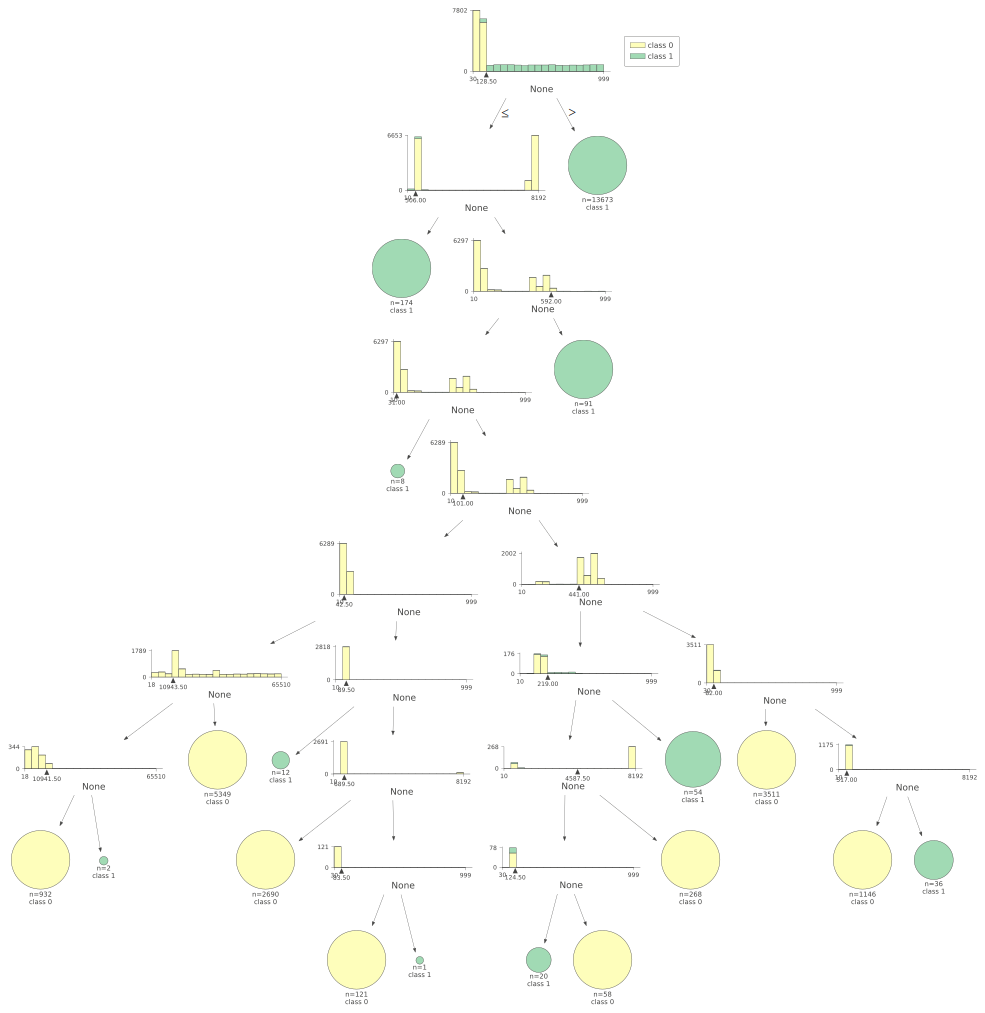

In [ ]:
viz

## SVM

svm

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)


In [ ]:
from sklearn.metrics import  classification_report , confusion_matrix
print(confusion_matrix(y_test, predictions))

[[3800  421]
 [ 371 3852]]


## test code

In [ ]:
traffic[0].payload.len

40

In [ ]:
dir(traffic[0].payload)

['_PickleType',
 '__all_slots__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__iterlen__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__orig_bases__',
 '__parameters__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_answered',
 '_defrag_pos',
 '_do_summary',
 '_name',
 '_overload_fields',
 '_pkt',
 '_resolve_alias',
 '_show_or_dump',
 '_superdir',
 '_ttl',
 'add_payload',
 'add_underlayer',
 'aliastypes',
 'answers',
 'build',
 'build_done',
 'build

In [ ]:
traffic[0].payload.fields

{'options': [],
 'version': 4,
 'ihl': 5,
 'tos': 0,
 'len': 40,
 'id': 12204,
 'flags': <Flag 2 (DF)>,
 'frag': 0,
 'ttl': 128,
 'proto': 6,
 'chksum': 61088,
 'src': '10.0.100.21',
 'dst': '10.0.100.110'}

In [ ]:
traffic[0].payload.fieldtype

{'version': <BitField (IP,IPerror,IPv46).version>,
 'ihl': <BitField (IP,IPerror,IPv46).ihl>,
 'tos': <XByteField (IP,IPerror,IPv46).tos>,
 'len': <ShortField (IP,IPerror,IPv46).len>,
 'id': <ShortField (IP,IPerror,IPv46).id>,
 'flags': <FlagsField (IP,IPerror,IPv46).flags>,
 'frag': <BitField (IP,IPerror,IPv46).frag>,
 'ttl': <ByteField (IP,IPerror,IPv46).ttl>,
 'proto': <ByteEnumField (IP,IPerror,IPv46).proto>,
 'chksum': <XShortField (IP,IPerror,IPv46).chksum>,
 'src': <scapy.fields.Emph at 0x7feb09d40910>,
 'dst': <scapy.fields.Emph at 0x7feb09d40960>,
 'options': <PacketListField (IP,IPerror,IPv46).options>}

In [ ]:
traffic[0].payload.name

'IP'

In [ ]:
unique_port_address = []
unique_54 = []

for packet in traffic:
    
    if packet.payload.len == 40:
        
        
        src = packet[IP].src
        dst = packet[IP].dst
        
        

        unique_54.append((src,dst))    
#print(unique_54)


count = 0
for i in unique_54:
    print(i)
    count += 1
    
    if count >= 100:
        break
        

        
        
import pandas as pd

df = pd.DataFrame(unique_54, columns = ['src','dst'])
  
print(df) 

('10.0.100.21', '10.0.100.110')
('10.0.100.16', '10.0.100.105')
('10.0.100.105', '10.0.100.16')
('10.0.100.110', '10.0.100.21')
('10.0.100.110', '10.0.100.21')
('10.0.100.16', '10.0.100.105')
('10.0.100.106', '10.0.100.105')
('10.0.100.105', '10.0.100.15')
('10.0.100.21', '10.0.100.110')
('10.0.100.105', '10.0.100.15')
('10.0.100.105', '10.0.100.16')
('10.0.100.110', '10.0.100.21')
('10.0.100.15', '10.0.100.105')
('10.0.100.21', '10.0.100.110')
('10.0.100.16', '10.0.100.105')
('10.0.100.105', '10.0.100.16')
('10.0.100.105', '10.0.100.16')
('10.0.100.110', '10.0.100.21')
('10.0.100.110', '10.0.100.20')
('10.0.100.110', '10.0.100.20')
('10.0.100.110', '10.0.100.20')
('10.0.100.16', '10.0.100.105')
('10.0.100.110', '10.0.100.20')
('10.0.100.21', '10.0.100.110')
('10.0.100.20', '10.0.100.110')
('10.0.100.105', '10.0.100.16')
('10.0.100.110', '10.0.100.21')
('10.0.100.16', '10.0.100.105')
('10.0.100.21', '10.0.100.110')
('10.0.100.110', '10.0.100.21')
('10.0.100.110', '10.0.100.21')
('10.0.

In [ ]:
traffic[0].payload.id
rows = []

for i in traffic:
    
    len_ = i.payload.len
    id_ = i.payload.id
    frag = i.payload.frag
    ttl = i.payload.ttl
    proto = i.payload.proto
    src =  i.payload.src
    dst =  i.payload.dst
    window = i.payload.window
    
    rows.append((len_, id_,frag, ttl,proto, src,dst, window))
#print(rows)

#for i in rows:
    #print(i)
    
import pandas as pd

df = pd.DataFrame(rows, columns = ['len','id','frag','ttl','proto','src','dst', 'window'])
  
print(df) 
    

In [ ]:
for packet in traffic:
    print(packet.payload.len)
    print(type(packet.payload.len))
    break

40
<class 'int'>
